<p style="font-family: Arial; font-size:2.2em;color:purple; font-style:bold"><br>

K-Ortalama Algoritması ile Yürüme Aktivitesinden Kullanıcı Tanımlama<br><br>
</p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Gerekli kütüphanelerin İçe Aktarılması<br><br>
</p>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

Dataset'i okuyup Pandas dataframe'e aktarma

In [2]:
data = pd.read_csv('./datasets/UserIdentificationFromWalkingActivity.csv')
data.head()

,time-step,x-acceleration,y-acceleration,z-acceleration
0,0.000000,0.69464,3.17350,7.5048
1,0.030639,0.14982,3.48680,9.2755
2,0.069763,-0.29965,1.94770,9.1120
3,0.099823,-1.68890,1.41650,10.1200
4,0.129820,-2.17930,0.95342,10.9240


In [3]:
data.shape

(149332, 4)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Veri Temizleme<br><br>
</p>

In [4]:
data.isnull().any(axis=1).sum()

0

Herhangi bir satırda null değer yok.

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time-step,149332.0,185.559916,167.160830,0.000,56.7800,127.370000,273.682500,676.680
x-acceleration,149332.0,-1.655328,2.866972,-19.572,-3.1463,-1.307600,-0.040861,19.314
y-acceleration,149332.0,8.769387,2.772235,-10.924,7.1643,8.853200,10.338000,19.572
z-acceleration,149332.0,0.555580,3.147621,-14.982,-1.2258,-0.081722,1.539100,19.341


In [6]:
data.columns

Index(['time-step', 'x-acceleration', 'y-acceleration', 'z-acceleration'], dtype='object')

Hangi özelliklere göre kümeleme yapmak istediğimizi seçelim.

In [7]:
features = ['time-step', 'x-acceleration', 'y-acceleration', 'z-acceleration']

- Dataframe' in %20 si üzerinden işlem yapmak isterseniz bunu kullanabilirsiniz. Bazı dataset'lerde milyonlarca satır olabiliyor. Bu da wcss değerini bulmaya çalışırken çok fazla vakit alıyor. Tabii bu kullandığınız cihazın özelliklerine göre değişebilir.

In [8]:
#X = data[features].sample(frac=0.2).values 
 

In [9]:
type(data[features])

pandas.core.frame.DataFrame

- Değerleri NumPy Array olarak atayalım.

In [10]:
X = data[features].values

In [11]:
type(X)

numpy.ndarray

In [12]:
X

array([[  0.00000000e+00,   6.94640000e-01,   3.17350000e+00,
          7.50480000e+00],
       [  3.06390000e-02,   1.49820000e-01,   3.48680000e+00,
          9.27550000e+00],
       [  6.97630000e-02,  -2.99650000e-01,   1.94770000e+00,
          9.11200000e+00],
       ..., 
       [  2.56060000e+02,  -6.94640000e-01,   5.82950000e+00,
          6.74210000e+00],
       [  2.56090000e+02,  -5.72050000e-01,   5.47540000e+00,
          7.85890000e+00],
       [  2.56120000e+02,  -6.94640000e-01,   5.62520000e+00,
          7.46400000e+00]])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Within-Cluster Sum of Squares (WCSS) Hesaplama<br><br>
</p>

In [13]:
wcss = []  #wcss değerlerin kaydetmek için
#1'den 15 kadar küme sayısını değiştirip WCSS değerini bulma.
for i in range(1,16):
    find_centroids =  KMeans(n_clusters = i,random_state = 0)
    find_centroids.fit(X)
    wcss.append(find_centroids.inertia_)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Optimum <mark style="background-color: yellow">K</mark> Değerini Bulma<br><br>
</p>

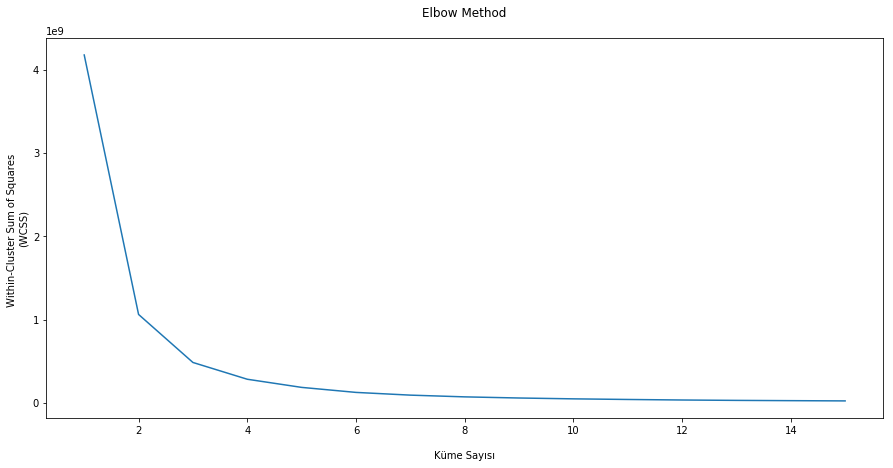

In [14]:
plt.figure(figsize=(15,7))
plt.plot(range(1,16), wcss) 
plt.title('Elbow Method\n')
plt.xlabel('\nKüme Sayısı')
plt.ylabel('Within-Cluster Sum of Squares \n(WCSS)')
plt.show()

Yukarıdaki grafiği yorumladığımızda Küme Sayısı 3 ve sonra için grafik daha istikrarlı seyrediyor. Bu yüzden küme sayımızı 3 olarak seçtik.

In [15]:
kmeans = KMeans(n_clusters = 3)
model= kmeans.fit_predict(X)
model

array([1, 1, 1, ..., 0, 0, 0])

In [16]:
model.shape


(149332,)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Sonucu Grafik Üzerinden Görme<br><br>
</p>

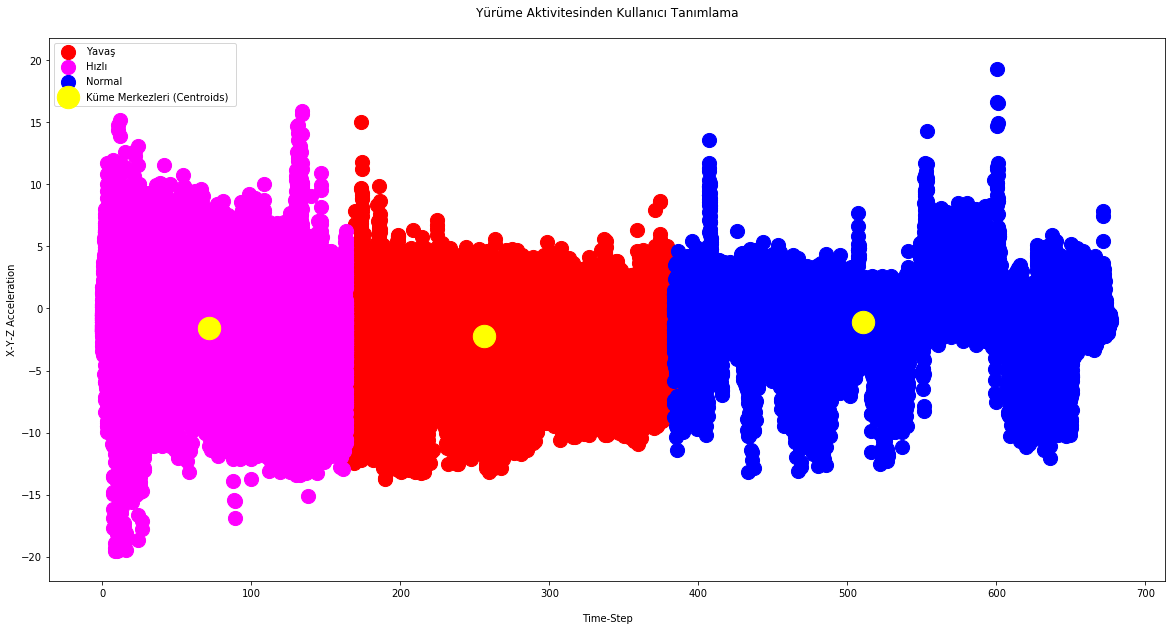

In [17]:
plt.figure(figsize=(20,10))
plt.scatter(X[model == 0, 0], X[model == 0, 1], s = 200, c = 'red', label = 'Yavaş')
plt.scatter(X[model == 1, 0], X[model == 1, 1], s = 200, c = 'magenta', label = 'Hızlı')
plt.scatter(X[model == 2, 0], X[model == 2, 1], s = 200, c = 'blue', label = 'Normal')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 500, c = 'yellow', label = 'Küme Merkezleri (Centroids) ')
plt.title('Yürüme Aktivitesinden Kullanıcı Tanımlama\n')
plt.xlabel('\nTime-Step')
plt.ylabel('X-Y-Z Acceleration')
plt.legend()
plt.show()